# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


from scipy import stats
from sklearn.cluster import KMeans
from sklearn.cluster import  AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage,dendrogram, fcluster

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df= pd.read_csv('marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [3]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [4]:
df['Income']=df['Income'].fillna(df['Income'].mean())
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [5]:
df.duplicated().sum()

0

### 5. Drop the columns which you think redundant for the analysis 

In [6]:
df=df.drop(columns=['ID','Dt_Customer'], axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [7]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [8]:
df['Marital_Status']=df['Marital_Status'].replace([ 'Married','Together', 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' ],[ 'Relationship', 'Relationship','Single','Single','Single','Single','Single'])
df['Marital_Status'].value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [9]:
df['Total_Expenses']=df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum (axis=1)
df.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,Relationship,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,776
3,1984,Graduation,Relationship,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,53
4,1981,PhD,Relationship,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,422
5,1967,Master,Relationship,62513.0,0,1,16,520,42,98,...,10,6,0,0,0,0,0,0,0,716
6,1971,Graduation,Single,55635.0,0,1,34,235,65,164,...,7,6,0,0,0,0,0,0,0,590
7,1985,PhD,Relationship,33454.0,1,0,32,76,10,56,...,4,8,0,0,0,0,0,0,0,169
8,1974,PhD,Relationship,30351.0,1,0,19,14,0,24,...,2,9,0,0,0,0,0,0,1,46
9,1950,PhD,Relationship,5648.0,1,1,68,28,0,6,...,0,20,1,0,0,0,0,0,0,49


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [10]:
df['Num_Total_Purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases'] 
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,1617,25
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,27,6
2,1965,Graduation,Relationship,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,776,21
3,1984,Graduation,Relationship,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,53,8
4,1981,PhD,Relationship,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,422,19


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [11]:
df['Kids']=df[ 'Kidhome' ]+df['Teenhome' ]
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,1617,25,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,27,6,2
2,1965,Graduation,Relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,776,21,0
3,1984,Graduation,Relationship,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,0,53,8,1
4,1981,PhD,Relationship,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,0,422,19,1


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [12]:
df['TotalAcceptedCmp']=df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,1,1617,25,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,27,6,2,0
2,1965,Graduation,Relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,776,21,0,0
3,1984,Graduation,Relationship,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,53,8,1,0
4,1981,PhD,Relationship,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,422,19,1,0


### 11. Drop those columns which we have used above for obtaining new features

In [13]:
col_dele=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumDealsPurchases','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df=df.drop(columns=col_dele, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,Relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,Relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,Relationship,58293.0,94,5,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [14]:
df['Age']=2024-df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)
df.head(3)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70
2,Graduation,Relationship,71613.0,26,4,0,776,21,0,0,59


In [15]:
dfc=df.copy()

### 13. Encode the categorical variables in the dataset

In [16]:
cate=['Education', 'Marital_Status']
le= LabelEncoder()

for i in  cate:
    df[i]=df[[i]].apply(le.fit_transform)

df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,1,58138.0,58,7,0,1617,25,0,1,67
1,2,1,46344.0,38,5,0,27,6,2,0,70
2,2,0,71613.0,26,4,0,776,21,0,0,59
3,2,0,26646.0,26,6,0,53,8,1,0,40
4,4,0,58293.0,94,5,0,422,19,1,0,43


### 14. Standardize the columns, so that values are in a particular range

In [17]:
df1=df.copy()
scaled_features=StandardScaler().fit_transform(df1.values)
scaled_features_df=pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
scaled_features_df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,1.346874,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,-0.742460,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,-0.742460,-1.022732,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,-0.742460,0.241519,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

Text(0, 0.5, 'Explained variance ratio')

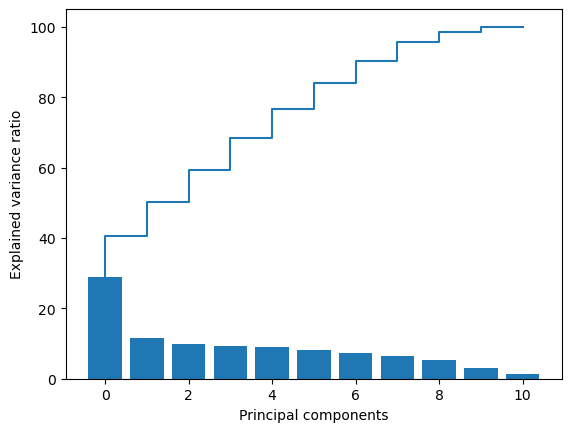

In [18]:
##covariance matrix
cov_matrix= np.cov(scaled_features.T)

##eigen value and eigen value
eig_vals, eig_vectors=np.linalg.eig(cov_matrix)


##scree plot
total= sum(eig_vals)
var_exp=[(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp= np.cumsum(var_exp)

##Diagram
plt.bar(range(11), var_exp)
plt.step(range(11), cum_var_exp)
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [19]:
pca=PCA(n_components=8)
pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316


In [20]:
#find optimal K using elbow plot
    
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)
    
    

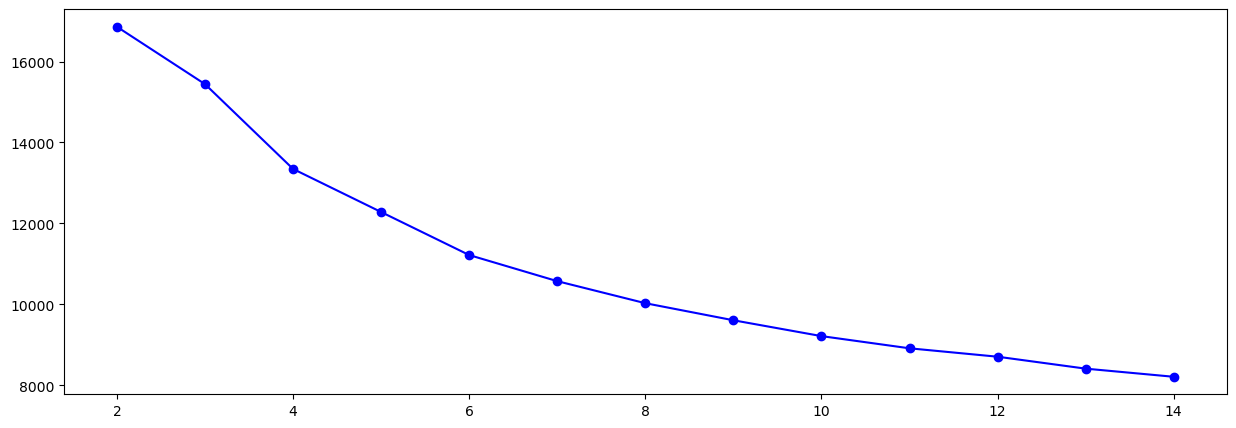

In [21]:
## creataing a dataframe of number of clusters and cluster errors.
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

## Elbow plot.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

. here take k=3 according to elbow plot

In [22]:
## Applying KMeans clustering for the optimal number of clusters obtained above.
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [23]:
## check the cluster labels
label = pd.DataFrame(kmeans.labels_,columns=['Label'])
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,0
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,1
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,0
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,1
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,2


In [24]:
kmeans_df['Label'].value_counts()

1    1023
2     704
0     513
Name: Label, dtype: int64

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

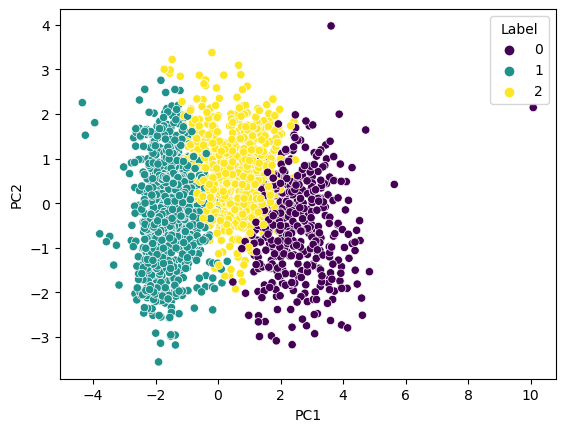

In [25]:
#plt.scattered(kmeans_df['pc1'],kmeans_df[pc2])

sns.scatterplot(data=kmeans_df,x='PC1',y='PC2', hue='Label', palette='viridis')

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

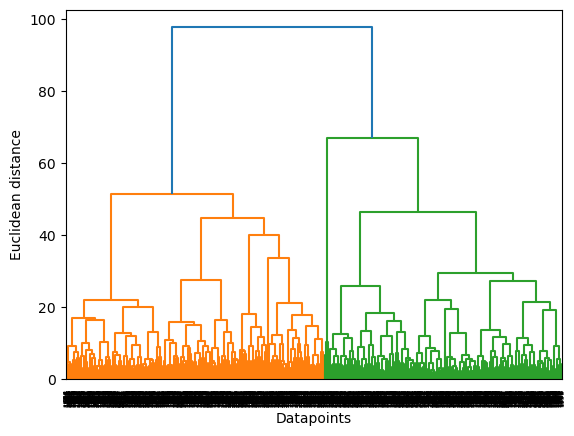

In [26]:

merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

* Computing silhoutte score for agglomerative clustering

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.19083932398838058
3 0.19859065923117852
4 0.11245037433443192
5 0.11424621756848156
6 0.13181821517761894
7 0.13957002140181554
8 0.13907063102689643
9 0.11337088108573284
10 0.11192131225138054
11 0.10382081162126386
12 0.10893099764773469
13 0.10233949588313333
14 0.09549869159575398


In [29]:
hie_cluster = AgglomerativeClustering(n_clusters=3,
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [30]:
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [31]:
df_hier = dfc.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70,1
2,Graduation,Relationship,71613.0,26,4,0,776,21,0,0,59,0
3,Graduation,Relationship,26646.0,26,6,0,53,8,1,0,40,1
4,PhD,Relationship,58293.0,94,5,0,422,19,1,0,43,0


### Visualization and Interpretation of results

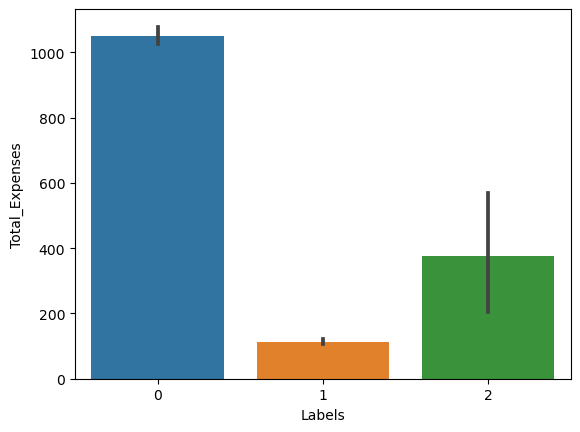

In [32]:
import seaborn as sns
sns.barplot(df_hier['Labels'],df_hier['Total_Expenses'])
plt.show()

*Total expenses is highest 0 cluster

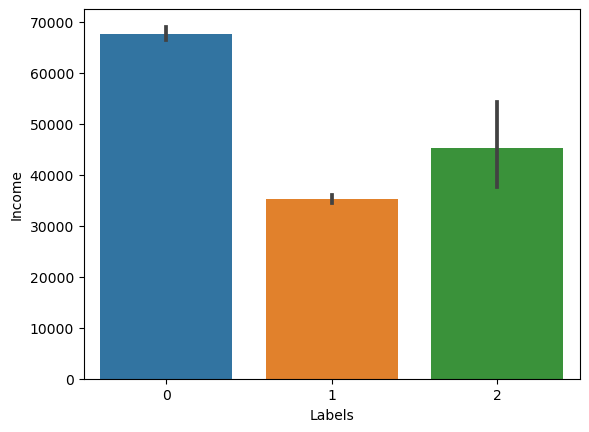

In [33]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()

 Income is also higher for 0 cluster as per visualization

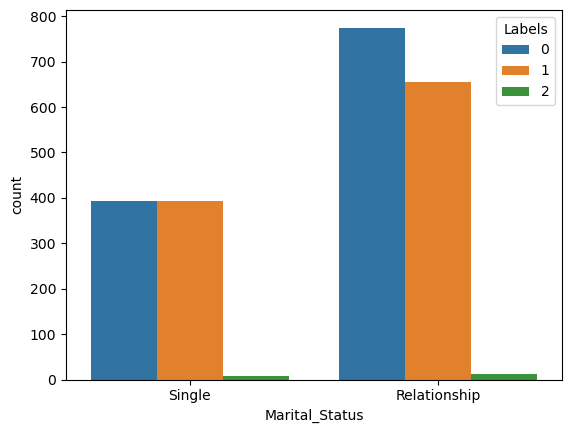

In [34]:
sns.countplot(df_hier['Marital_Status'],hue='Labels',data=df_hier)
plt.show()

* We can observe that the most of the customers who are in a relationship falls under cluster 0.





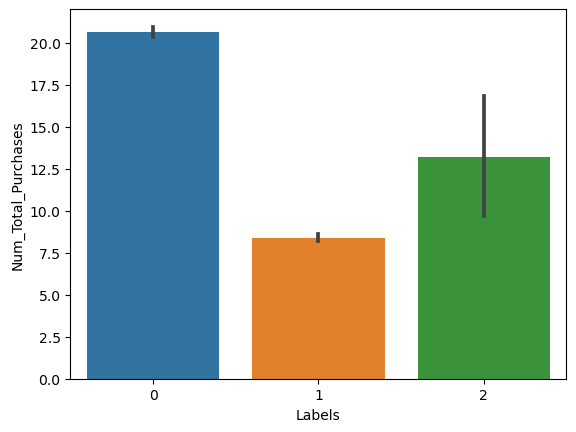

In [35]:
sns.barplot(df_hier['Labels'],df_hier['Num_Total_Purchases'])
plt.show()

total number of purchases higher for 0 cluster

-----
## Happy Learning
-----